In [25]:
# 1. Define non-country keywords and allowlist
non_country_keywords = [
    "Africa", "Europe", "America", "Asia", "Oceania", "Arab", "World",
    "High income", "Low income", "Middle income", "Euro area", "OECD", "IDA",
    "IBRD", "G7", "G20", "Least developed", "Landlocked", "Small states", "Sub-Saharan"
]

# Manual override: countries that match keywords but are real countries
allowlist = {
    "Egypt, Arab Rep.", "Saudi Arabia", "South Africa",
    "Syrian Arab Republic", "United Arab Emirates", "Central African Republic"
}

# Define filter function
def is_region_or_group(name):
    return (
        any(keyword in str(name) for keyword in non_country_keywords)
        and name not in allowlist
    )


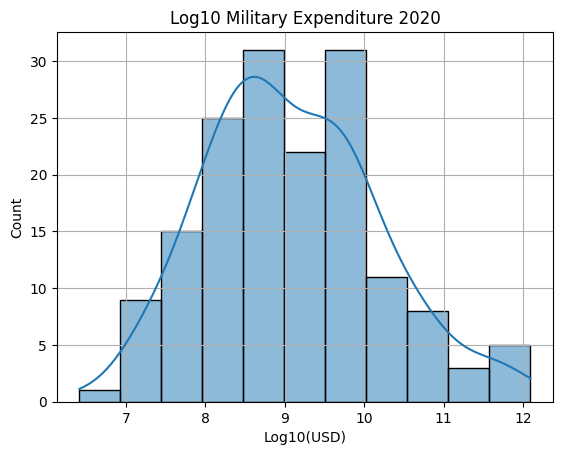

Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9866667678829266), pvalue=np.float64(0.12765409820487963))
D’Agostino: NormaltestResult(statistic=np.float64(3.539115198503806), pvalue=np.float64(0.17040836093820164))
Anderson-Darling: AndersonResult(statistic=np.float64(0.5925791088764925), critical_values=array([0.563, 0.641, 0.769, 0.897, 1.067]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(9.088518794540079), scale=np.float64(1.0914115313964254))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [26]:
# 2. Load and visualize military expenditure data (2020)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, anderson

# Load and preprocess
military_df = pd.read_csv("data/military_expanditure.csv", skiprows=5, header=None)
with open("data/military_expanditure.csv") as f:
    for _ in range(4): next(f)
    headers = f.readline().strip().split(",")
column_names = headers[:4] + [y.strip('"') for y in headers[4:-1]] + ["extra"]
military_df.columns = [c.strip('"') for c in column_names]
military_df = military_df[~military_df["Country Name"].apply(is_region_or_group)]

# Log-transform
military_2020 = pd.to_numeric(military_df["2020"], errors="coerce").dropna()
log_military = np.log10(military_2020[military_2020 > 0])

# Plot
sns.histplot(log_military, kde=True)
plt.title("Log10 Military Expenditure 2020")
plt.xlabel("Log10(USD)")
plt.grid(True)
plt.show()

# Normality tests
print("Shapiro-Wilk:", shapiro(log_military))
print("D’Agostino:", normaltest(log_military))
print("Anderson-Darling:", anderson(log_military))


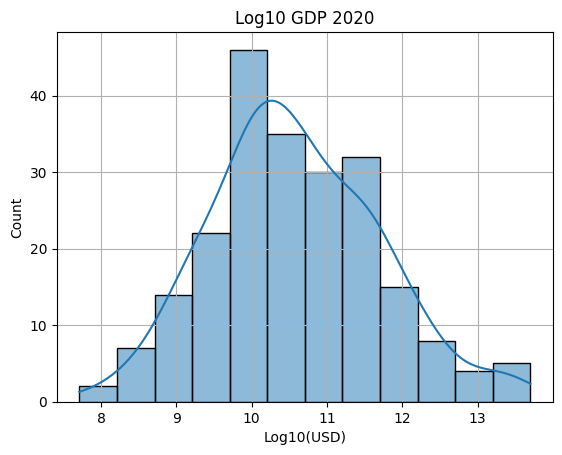

Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9912711665605055), pvalue=np.float64(0.21105068793518392))
D’Agostino: NormaltestResult(statistic=np.float64(3.174535304330681), pvalue=np.float64(0.20448356935788958))
Anderson-Darling: AndersonResult(statistic=np.float64(0.5331881836959553), critical_values=array([0.566, 0.645, 0.773, 0.902, 1.073]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(10.581714330888413), scale=np.float64(1.1112681401863307))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [27]:
# 3. GDP (2020)
gdp_df = pd.read_csv("data/gdp.csv", skiprows=5, header=None)
with open("data/gdp.csv") as f:
    for _ in range(4): next(f)
    headers = f.readline().strip().split(",")
column_names = headers[:4] + [y.strip('"') for y in headers[4:-1]] + ["extra"]
gdp_df.columns = [c.strip('"') for c in column_names]
gdp_df = gdp_df[~gdp_df["Country Name"].apply(is_region_or_group)]

gdp_2020 = pd.to_numeric(gdp_df["2020"], errors="coerce").dropna()
log_gdp = np.log10(gdp_2020[gdp_2020 > 0])

sns.histplot(log_gdp, kde=True)
plt.title("Log10 GDP 2020")
plt.xlabel("Log10(USD)")
plt.grid(True)
plt.show()

print("Shapiro-Wilk:", shapiro(log_gdp))
print("D’Agostino:", normaltest(log_gdp))
print("Anderson-Darling:", anderson(log_gdp))


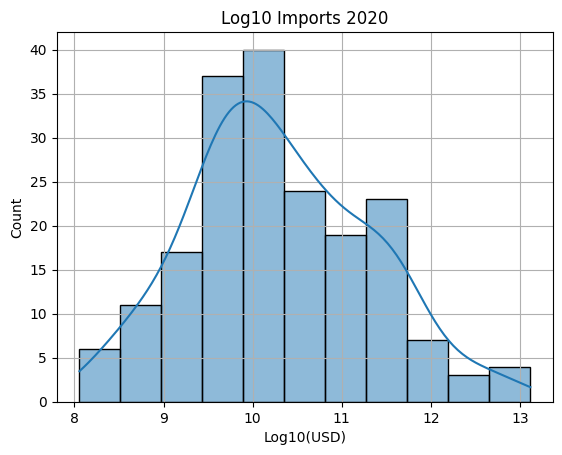

Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.98956380566964), pvalue=np.float64(0.1776536708014992))
D’Agostino: NormaltestResult(statistic=np.float64(2.8864864297264203), pvalue=np.float64(0.23616059576319387))
Anderson-Darling: AndersonResult(statistic=np.float64(0.6210369899642387), critical_values=array([0.565, 0.643, 0.771, 0.9  , 1.07 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(10.30279320123462), scale=np.float64(1.017119000884922))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [28]:
# 4. Imports (2020)
imports_df = pd.read_csv("data/imports.csv", skiprows=5, header=None)
with open("data/imports.csv") as f:
    for _ in range(4): next(f)
    headers = f.readline().strip().split(",")
column_names = headers[:4] + [y.strip('"') for y in headers[4:-1]] + ["extra"]
imports_df.columns = [c.strip('"') for c in column_names]
imports_df = imports_df[~imports_df["Country Name"].apply(is_region_or_group)]

imports_2020 = pd.to_numeric(imports_df["2020"], errors="coerce").dropna()
log_imports = np.log10(imports_2020[imports_2020 > 0])

sns.histplot(log_imports, kde=True)
plt.title("Log10 Imports 2020")
plt.xlabel("Log10(USD)")
plt.grid(True)
plt.show()

print("Shapiro-Wilk:", shapiro(log_imports))
print("D’Agostino:", normaltest(log_imports))
print("Anderson-Darling:", anderson(log_imports))


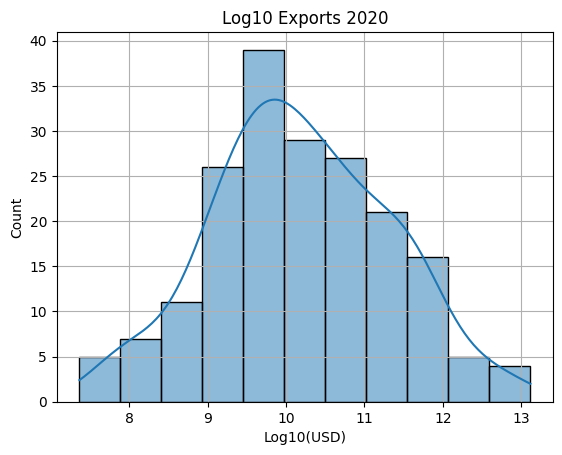

Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9941769690196446), pvalue=np.float64(0.6647016243383969))
D’Agostino: NormaltestResult(statistic=np.float64(0.7626955982076572), pvalue=np.float64(0.6829403222773835))
Anderson-Darling: AndersonResult(statistic=np.float64(0.3066992802711752), critical_values=array([0.565, 0.643, 0.771, 0.9  , 1.07 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(10.186400310381721), scale=np.float64(1.1393496327334278))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [29]:
# 5. Exports (2020)
exports_df = pd.read_csv("data/exports.csv", skiprows=5, header=None)
with open("data/exports.csv") as f:
    for _ in range(4): next(f)
    headers = f.readline().strip().split(",")
column_names = headers[:4] + [y.strip('"') for y in headers[4:-1]] + ["extra"]
exports_df.columns = [c.strip('"') for c in column_names]
exports_df = exports_df[~exports_df["Country Name"].apply(is_region_or_group)]

exports_2020 = pd.to_numeric(exports_df["2020"], errors="coerce").dropna()
log_exports = np.log10(exports_2020[exports_2020 > 0])

sns.histplot(log_exports, kde=True)
plt.title("Log10 Exports 2020")
plt.xlabel("Log10(USD)")
plt.grid(True)
plt.show()

print("Shapiro-Wilk:", shapiro(log_exports))
print("D’Agostino:", normaltest(log_exports))
print("Anderson-Darling:", anderson(log_exports))


📈 Differenced Pearson Correlation: 0.280


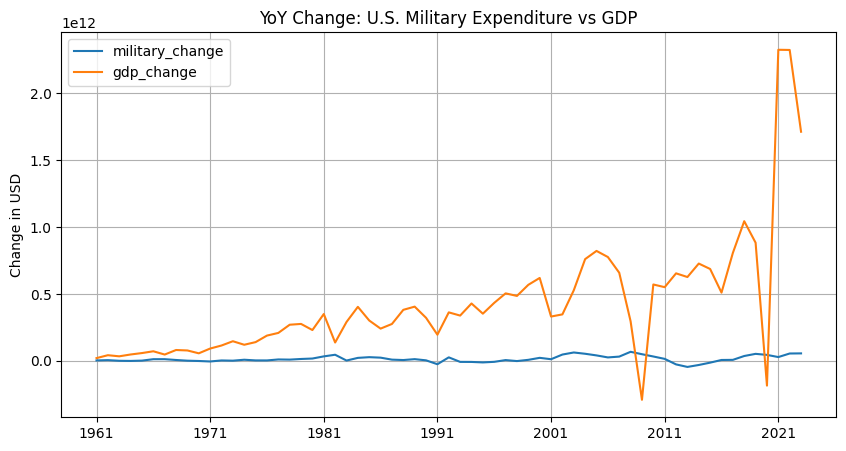

In [32]:
# 📘 Differenced Pearson Correlation: U.S. Military Spending vs GDP (1961–2024)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load military expenditure
military_df = pd.read_csv("data/military_expanditure.csv", skiprows=5, header=None)
with open("data/military_expanditure.csv") as f:
    for _ in range(4): next(f)
    military_headers = f.readline().strip().split(",")
military_columns = military_headers[:4] + [y.strip('"') for y in military_headers[4:-1]] + ["extra"]
military_df.columns = [c.strip('"') for c in military_columns]

# Load GDP data
gdp_df = pd.read_csv("data/gdp.csv", skiprows=5, header=None)
with open("data/gdp.csv") as f:
    for _ in range(4): next(f)
    gdp_headers = f.readline().strip().split(",")
gdp_columns = gdp_headers[:4] + [y.strip('"') for y in gdp_headers[4:-1]] + ["extra"]
gdp_df.columns = [c.strip('"') for c in gdp_columns]

# Extract U.S. data
years = [str(y) for y in range(1960, 2025)]
usa_military = military_df[military_df["Country Name"] == "United States"]
usa_gdp = gdp_df[gdp_df["Country Name"] == "United States"]

military_series = pd.Series(pd.to_numeric(usa_military[years].values.flatten(), errors="coerce"), index=years).dropna()
gdp_series = pd.Series(pd.to_numeric(usa_gdp[years].values.flatten(), errors="coerce"), index=years).dropna()

# First differences to remove trend
military_diff = military_series.diff().dropna()
gdp_diff = gdp_series.diff().dropna()

# Align and compute correlation
aligned = pd.DataFrame({
    "military_change": military_diff,
    "gdp_change": gdp_diff
}).dropna()

# Pearson correlation
correlation = aligned["military_change"].corr(aligned["gdp_change"])
print(f"📈 Differenced Pearson Correlation: {correlation:.3f}")

# Optional: plot
aligned.plot(title="YoY Change: U.S. Military Expenditure vs GDP", figsize=(10, 5))
plt.ylabel("Change in USD")
plt.grid(True)
plt.show()
